### Implementation

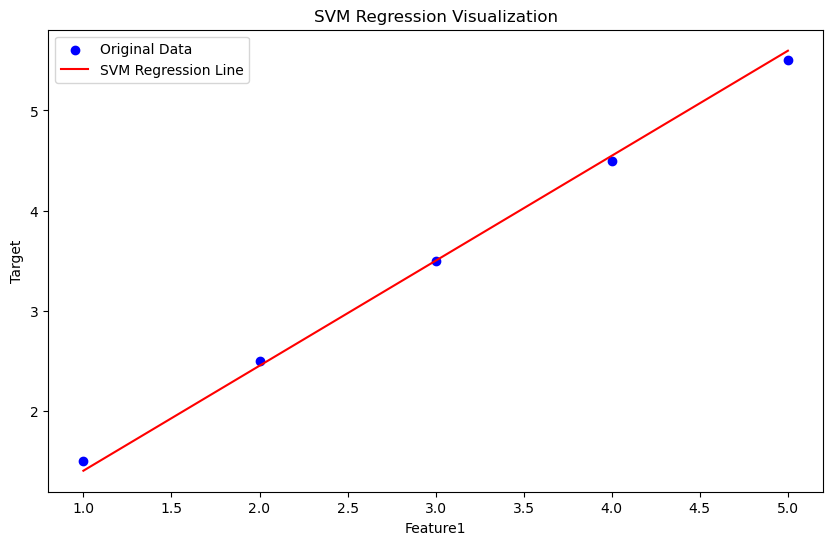

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with two features and a target variable
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [2, 4, 6, 8, 10],
    'Target': [1.5, 2.5, 3.5, 4.5, 5.5]
}
df = pd.DataFrame(data)

X = df[['Feature1', 'Feature2']].values
y = df['Target'].values

class SVMRegressor:
    def __init__(self, C=1.0, epsilon=0.1, learning_rate=0.001, n_iters=1000):
        self.C = C
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] - (np.dot(x_i, self.w) + self.b)
                if abs(condition) > self.epsilon:
                    if condition > 0:
                        self.w += self.learning_rate * (x_i - (1/self.C) * self.w)
                        self.b += self.learning_rate * 1
                    else:
                        self.w -= self.learning_rate * (x_i - (1/self.C) * self.w)
                        self.b -= self.learning_rate * 1

    def predict(self, X):
        return np.dot(X, self.w) + self.b

# Train the model
model = SVMRegressor()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Visualization
plt.figure(figsize=(10, 6))

# Original data points
plt.scatter(df['Feature1'], y, color='blue', label='Original Data')

# Regression line using only Feature1 for simplicity
plt.plot(df['Feature1'], predictions, color='red', label='SVM Regression Line')

plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('SVM Regression Visualization')
plt.legend()
plt.show()

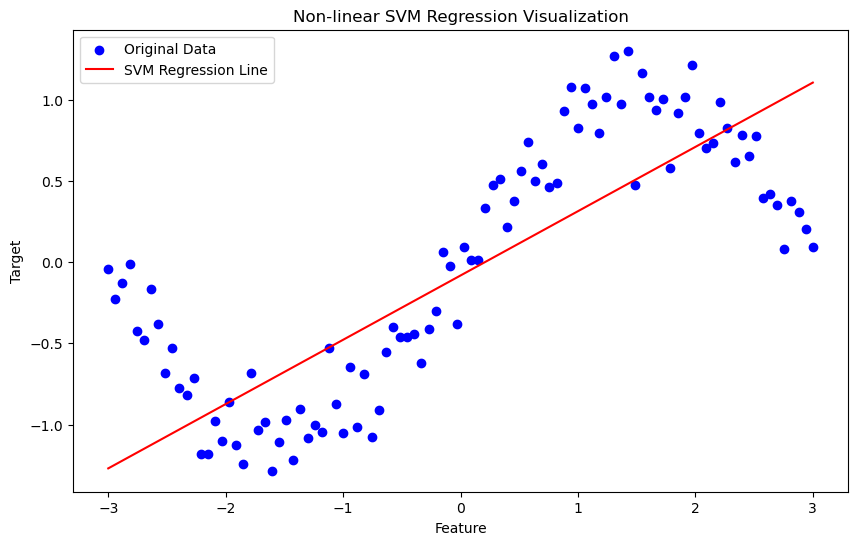

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a non-linear dataset
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

class SVMRegressor:
    def __init__(self, C=1.0, epsilon=0.1, learning_rate=0.001, n_iters=5000):
        self.C = C
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] - (np.dot(x_i, self.w) + self.b)
                if abs(condition) > self.epsilon:
                    if condition > 0:
                        self.w += self.learning_rate * (x_i - (1/self.C) * self.w)
                        self.b += self.learning_rate * 1
                    else:
                        self.w -= self.learning_rate * (x_i - (1/self.C) * self.w)
                        self.b -= self.learning_rate * 1

    def predict(self, X):
        return np.dot(X, self.w) + self.b

# Train the model
model = SVMRegressor()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Visualization
plt.figure(figsize=(10, 6))

# Original data points
plt.scatter(X, y, color='blue', label='Original Data')

# Regression line
plt.plot(X, predictions, color='red', label='SVM Regression Line')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Non-linear SVM Regression Visualization')
plt.legend()
plt.show()